# Projeto Final


## Alunos

Victor Jurdi

Lucas Ohara

In [121]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import uniform, expon, norm, probplot, percentileofscore, t
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor






## Introdução

A ideia inicial do projeto consiste em, através de técnicas de regressão, realizar uma análise dos dados de atributos de jogadores do jogo FIFA 18 e tentar criar uma predição do valor dos jogadores em questão. Para isso, o software irá analisar uma série de características quantitativas que os players apresentam.

A análise exploratória foi feita com base no salário, idade, pontuação geral do jogador, corrida, etc. com a finalidade de estimar, mediante a essas e a um total de 39 categorias diferentes, o valor de mercado de qualquer jogador presente na base de dados usando diferentes técnicas para melhor precisão.

## Leitura e liempeza do Database

Para a limpeza foi feita a remoção de letras que acompanhavam alguns números no salário dos jogadores estes continham as letras K e M que simbolizam 1.000 e 1.000.000, respectivamente e o símbolo da moeda em uso “€” (euro), em skills foi necessário remover alguns valores que estavam mal formatados, por exemplo uma das células continha o valor “79+2” que não era possível ser rodado pelo programa e por fim as posições preferidas dos jogadores foi alterada para no máximo uma posição, duas ou mais posições causava problemas na análise futura pois foi feito um agrupamento por posição de cada jogador. 

In [122]:
fifa = pd.read_csv("Fifa.csv")
fifa.head()
#leitura do database dos jogadores

C:\Users\victo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
fifa1 = fifa.drop(columns=['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Special', 'ID', 'CAM',
        'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 
        'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM','RS', 'RW', 'RWB', 'ST'])
fifa1
#filtrando colunas indesejadas

,Unnamed: 0,Age,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,Balance,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0,32,94,94,€95.5M,€565K,89,63,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,1,30,93,93,€105M,€565K,92,48,90,95,...,88,85,26,87,73,28,59,90,85,RW
2,2,25,92,94,€123M,€280K,94,56,96,82,...,81,80,33,90,78,24,53,80,83,LW
3,3,30,92,92,€97M,€510K,88,78,86,60,...,83,87,38,77,89,45,80,84,88,ST
4,4,31,92,92,€61M,€230K,58,29,52,35,...,55,25,11,61,44,10,83,70,11,GK
5,5,28,91,91,€92M,€355K,79,80,78,80,...,83,88,19,83,79,42,84,78,87,ST
6,6,26,90,92,€64.5M,€215K,57,38,60,43,...,50,31,13,58,40,21,64,68,13,GK
7,7,26,90,91,€90.5M,€295K,93,54,93,91,...,86,79,22,87,79,27,65,86,79,LW
8,8,27,90,90,€79M,€340K,60,60,71,69,...,90,87,69,52,77,82,74,88,82,CDM CM
9,9,29,90,90,€77M,€275K,78,50,75,69,...,75,88,18,80,72,22,85,70,88,ST


In [124]:
fifa1.describe()

,Unnamed: 0,Age,Overall,Potential
count,17981.000000,17981.000000,17981.000000,17981.000000
mean,8990.000000,25.144541,66.247984,71.190813
std,5190.811931,4.614272,6.987965,6.102199
min,0.000000,16.000000,46.000000,46.000000
25%,4495.000000,21.000000,62.000000,67.000000
50%,8990.000000,25.000000,66.000000,71.000000
75%,13485.000000,28.000000,71.000000,75.000000
max,17980.000000,47.000000,94.000000,94.000000


In [125]:
fifa2=fifa1.dropna()

In [126]:
valores=[]
#eliminando unidades em K e M
for e in fifa2['Value']:
    if 'M' in e:
        
        M=float(e.replace('M','')[1:])*1000000
        valores.append(M)
    elif 'K' in e:
        
        K=float(e.replace('K',"")[1:])*1000
        valores.append(K)
        
    else:
        a = float(e[1:])
        valores.append(a)

fifa2['Value1']=valores
    
fifa2.replace(fifa2['Value'],fifa2['Value1'])
    
fifa2.drop(columns=['Value'])
fifa2.head()

,Unnamed: 0,Age,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,Balance,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Value1
0,0,32,94,94,€95.5M,€565K,89,63,89,63,...,94,23,91,92,31,80,85,88,ST LW,95500000.0
1,1,30,93,93,€105M,€565K,92,48,90,95,...,85,26,87,73,28,59,90,85,RW,105000000.0
2,2,25,92,94,€123M,€280K,94,56,96,82,...,80,33,90,78,24,53,80,83,LW,123000000.0
3,3,30,92,92,€97M,€510K,88,78,86,60,...,87,38,77,89,45,80,84,88,ST,97000000.0
4,4,31,92,92,€61M,€230K,58,29,52,35,...,25,11,61,44,10,83,70,11,GK,61000000.0


In [127]:
drop_row=fifa2[fifa2['Value1']==0].index
drop_row
fifa2.drop(drop_row,inplace=True)

In [128]:
salarios=[]
#eliminando unidades em K e M
for e in fifa2['Wage']:
    if 'M' in e:
        
        M=float(e.replace('M','')[1:])*1000000
        salarios.append(M)
    elif 'K' in e:
        
        K=float(e.replace('K',"")[1:])*1000
        salarios.append(K)
        
    else:
        a = float(e[1:])
        salarios.append(a)

fifa2['Wage1']=salarios
    
fifa2.replace(fifa2['Wage'],fifa2['Wage1'])
    
fifa2.drop(columns=['Wage'])
fifa2.head()

,Unnamed: 0,Age,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,Balance,...,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Value1,Wage1
0,0,32,94,94,€95.5M,€565K,89,63,89,63,...,23,91,92,31,80,85,88,ST LW,95500000.0,565000.0
1,1,30,93,93,€105M,€565K,92,48,90,95,...,26,87,73,28,59,90,85,RW,105000000.0,565000.0
2,2,25,92,94,€123M,€280K,94,56,96,82,...,33,90,78,24,53,80,83,LW,123000000.0,280000.0
3,3,30,92,92,€97M,€510K,88,78,86,60,...,38,77,89,45,80,84,88,ST,97000000.0,510000.0
4,4,31,92,92,€61M,€230K,58,29,52,35,...,11,61,44,10,83,70,11,GK,61000000.0,230000.0


In [129]:
drop_row=fifa2[fifa2['Wage1']==0].index
drop_row
fifa2.drop(drop_row,inplace=True)

In [130]:
colunas = ['Unnamed: 0','Age', 'Overall', 'Potential', 'Value', 'Wage', 'Preferred Positions']

cols = [col for col in fifa2.columns if col not in colunas]

for i in cols:
    fifa2[i] = fifa2[i].apply(lambda x: eval(x) if isinstance(x,str) else x)
    
#valores em string


In [131]:
#definir todas as linhas que serão importantes para análise (no caso, todas) mas que será necessário durante a análise exploratória

linhas = []
i = 0
while i < len(fifa["Unnamed: 0"]):
    linhas.append(fifa["Unnamed: 0"][i])
    i+=1

## Posições Preferidas

Nesta coluna, é necessário reduzir a quantidade de posicões preferidas de um determinado jogador atuar para apenas uma. Dessa forma, foi determinado que seria selecionada a primeira posição que mostra na célula do dataset, descartando as demais

In [132]:
#reduzir o dataset selecionando apenas as features que importarão para a seguinte análise ("Preferred Positions")

linhas = linhas
colunas = ["Preferred Positions"]
position = fifa2.loc[linhas, colunas]

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


In [133]:
#retirar todas as linhas em que em apresentam "NaN (Not a Number)"

position = position.dropna()
position.head()

,Preferred Positions
0,ST LW
1,RW
2,LW
3,ST
4,GK


In [134]:
#programa que separa as posições em cada célula a cada espaço e seleciona apenas a primeira, que é a preferida do jogador

posicao = []
for posicoes in position["Preferred Positions"]:
    uma_posicao = posicoes.split(" ") #separa as posições
    posicao.append(uma_posicao[0]) #seleciona apenas a primeira de cada célula

fifa2["Preferred Position"] = posicao #adicionar uma coluna chamada de "Preferred Position" com as alterações realizadas

fifa2.head()

,Unnamed: 0,Age,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,Balance,...,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Value1,Wage1,Preferred Position
0,0,32,94,94,€95.5M,€565K,89,63,89,63,...,91,92,31,80,85,88,ST LW,95500000.0,565000.0,ST
1,1,30,93,93,€105M,€565K,92,48,90,95,...,87,73,28,59,90,85,RW,105000000.0,565000.0,RW
2,2,25,92,94,€123M,€280K,94,56,96,82,...,90,78,24,53,80,83,LW,123000000.0,280000.0,LW
3,3,30,92,92,€97M,€510K,88,78,86,60,...,77,89,45,80,84,88,ST,97000000.0,510000.0,ST
4,4,31,92,92,€61M,€230K,58,29,52,35,...,61,44,10,83,70,11,GK,61000000.0,230000.0,GK


# Análise Exploratória

Acreditamos que algumas variáveis são responsáveis por influenciar na variável "Value", e aqui poderemos observar essas relações

In [135]:
cor=fifa2.corr()

In [136]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]), #tamanho da fonte das variáveis
            
            dict(selector="td",
                 props=[('padding', "0em 0em")]), #tamanho dos retângulos  
            
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]), #tamanho da fonte das variáveis quando passsar o mouse sobre elas
            
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')]) #tamanho dos valores quando passar o mouse sobre eles
]

cor.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

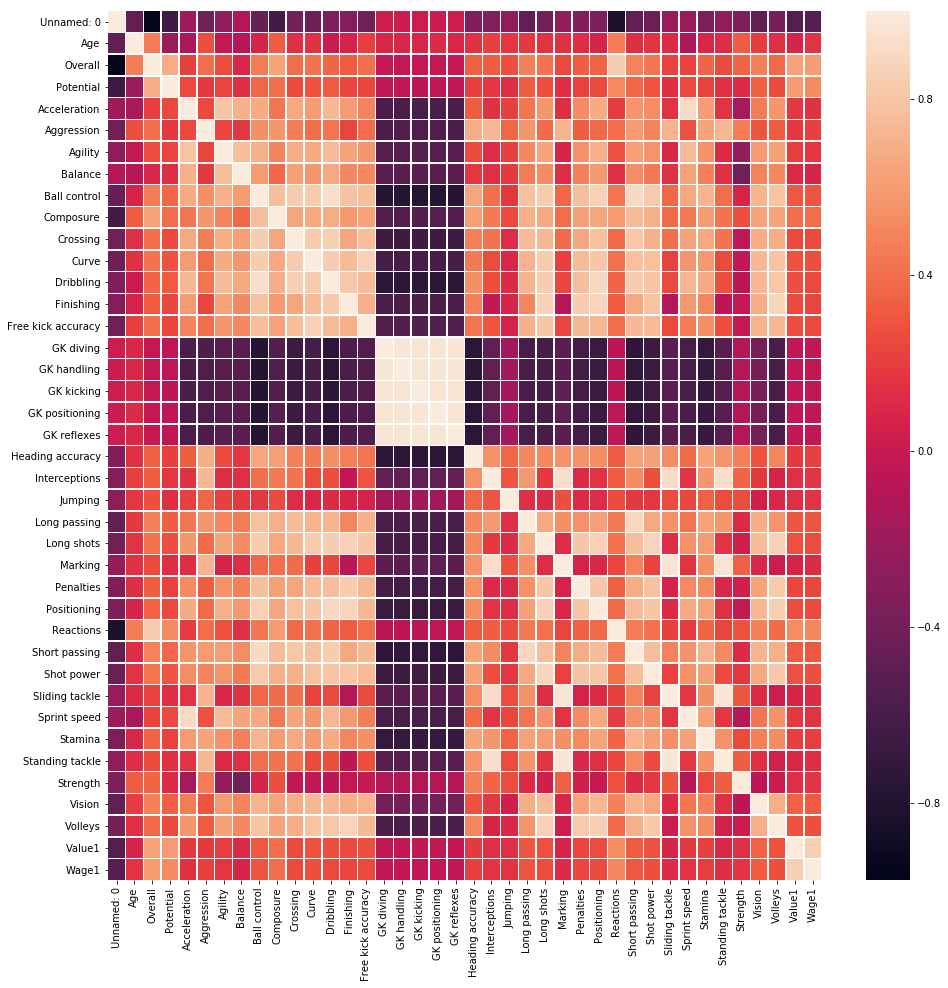

In [137]:
plt.figure(figsize= (16, 16))
sns.heatmap(cor, linewidth=0.5);

## Distribuição Valor

In [138]:
valor=fifa2['Value1']

In [139]:
fifa2.Value1.describe()

count    1.772500e+04
mean     2.419841e+06
std      5.384761e+06
min      1.000000e+04
25%      3.250000e+05
50%      7.000000e+05
75%      2.100000e+06
max      1.230000e+08
Name: Value1, dtype: float64

In [140]:
valor_min = fifa2.Value1.min()
valor_max = fifa2.Value1.max()

print('O jogador mais barato do jogo custa: €{:.2f}'.format(valor_min))
print('O jogador mais caro do jogo custa: €{:.2f}'.format(valor_max))


O jogador mais barato do jogo custa: €10000.00
O jogador mais caro do jogo custa: €123000000.00


## Value x Overall

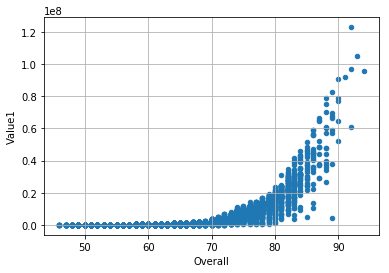

In [141]:
fifa2.plot.scatter(x="Overall",y="Value1");

plt.grid(True)

Atributo dado após a análise de todas as habilidades do jogador, esta categoria vem predefinida no dataset e com isso estima-se que ela seja derivada de uma regressão feita pelos próprios desenvolvedores do jogo, isso se prova pela forte relação que ela possui com o Y, como mostrado ao lado.

## Value x Age

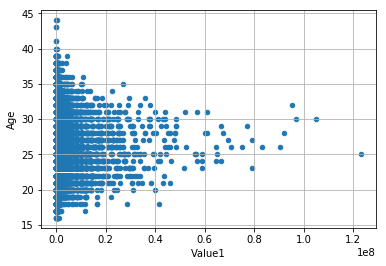

In [142]:
fifa2.plot.scatter(x="Value1",y="Age");

plt.grid(True)

O gráfico gerado pela correlação das duas variáveis é mostrado acima e demonstra que a idade não possui uma correlação forte com o Y como será evidenciado melhor posteriormente.

## Value x Skills

In [143]:
#definir todas as features que compõe as habilidades do jogador ("skills") 

skills = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

In [144]:
#reduzir o dataset selecionando apenas as features que importarão para a seguinte análise ("Value" e todas as skills)

linhas = linhas
colunas = ["Value1", 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

value_skills = fifa2.loc[linhas, colunas]

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


In [145]:
#retirar todas as linhas em que em apresentam "NaN (Not a Number)"

value_skills = value_skills.dropna()

C:\Users\victo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


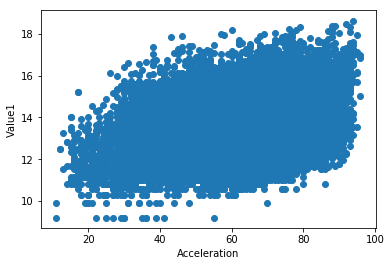

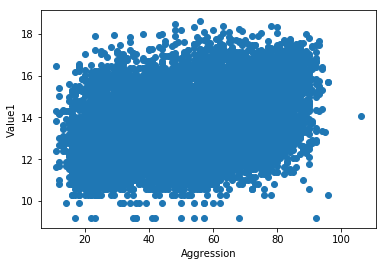

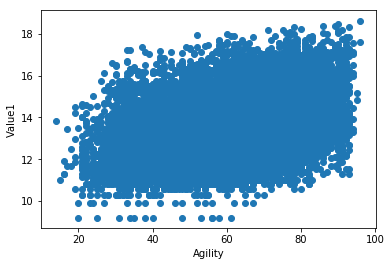

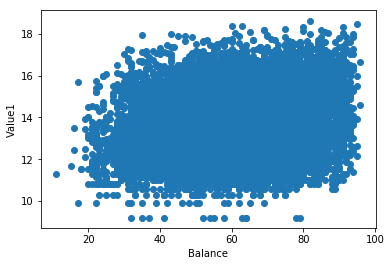

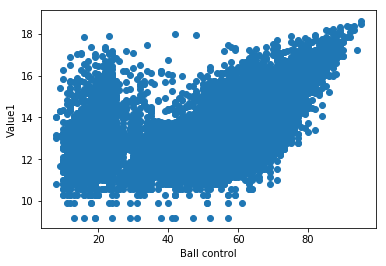

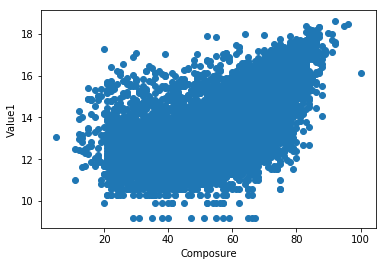

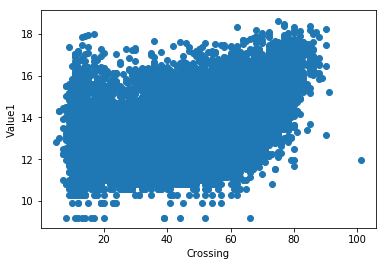

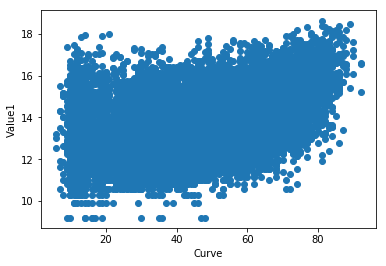

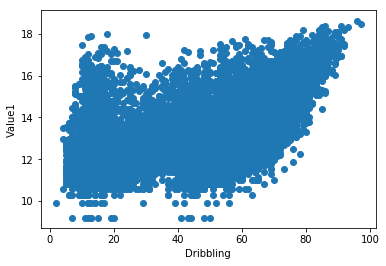

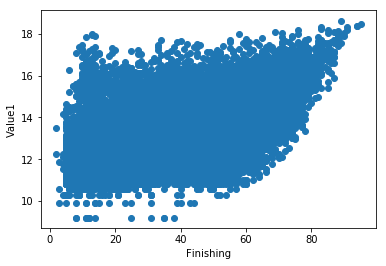

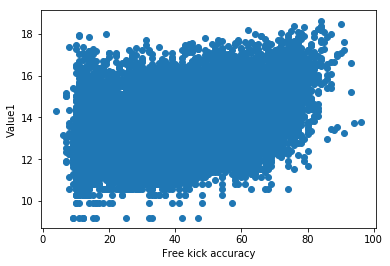

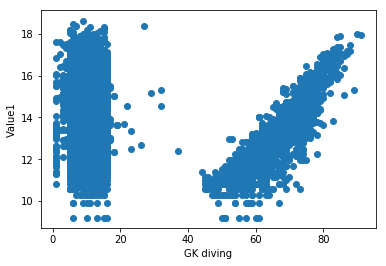

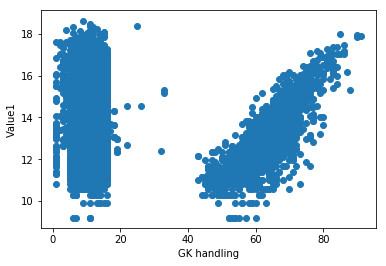

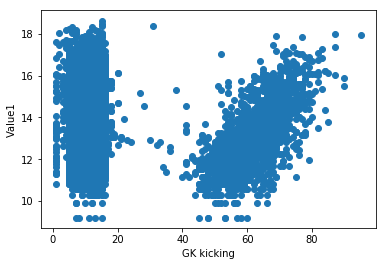

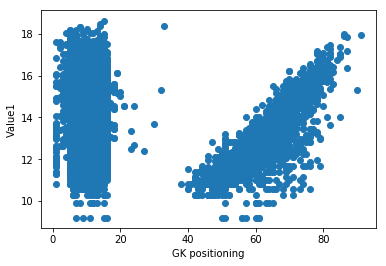

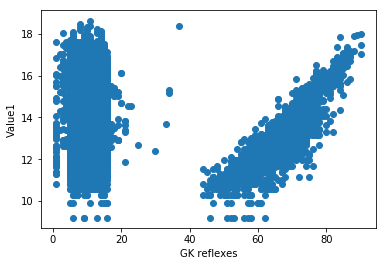

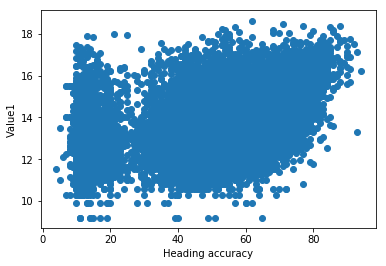

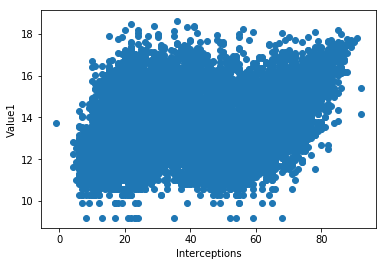

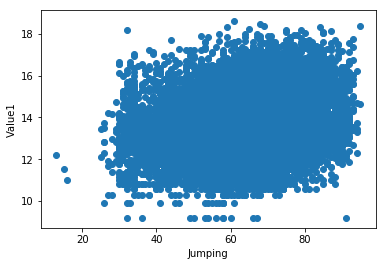

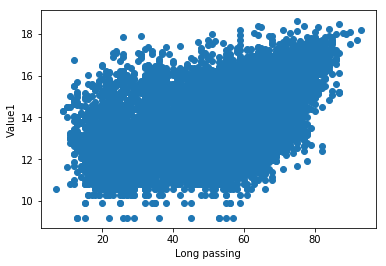

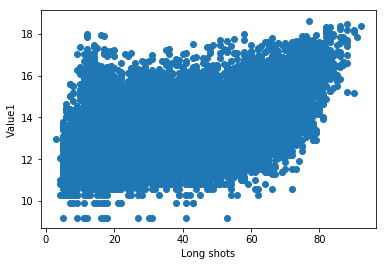

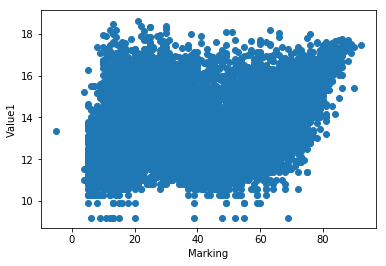

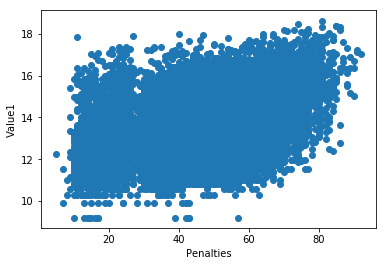

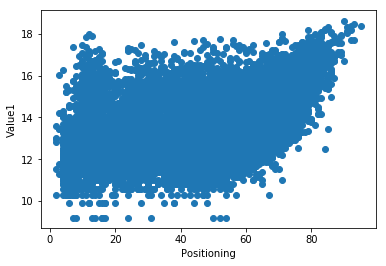

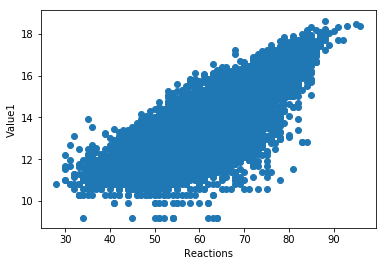

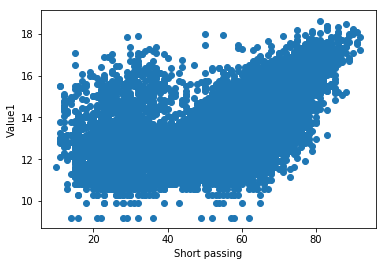

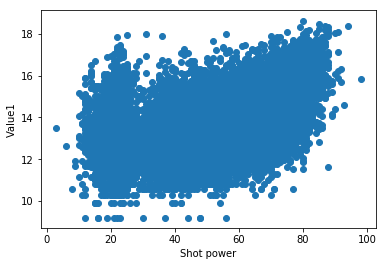

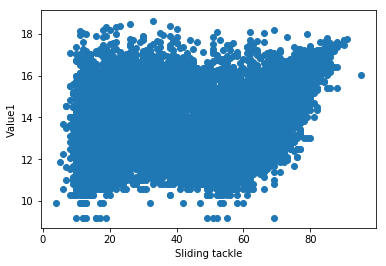

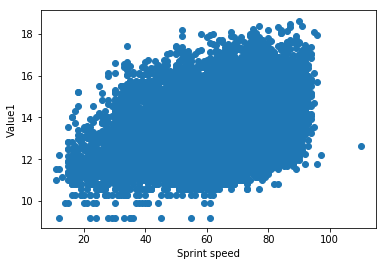

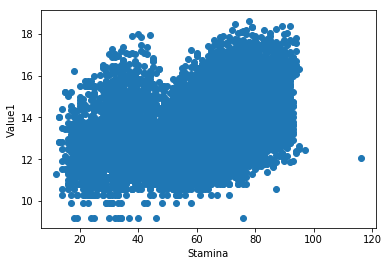

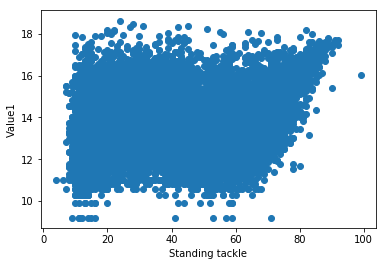

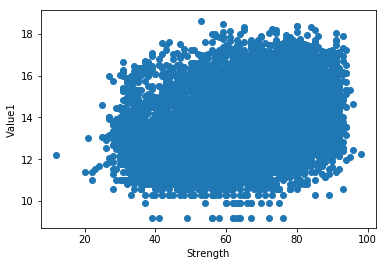

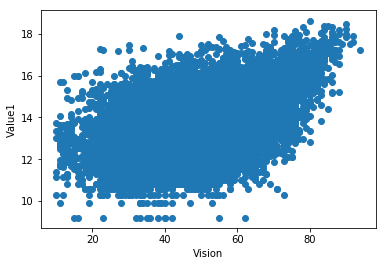

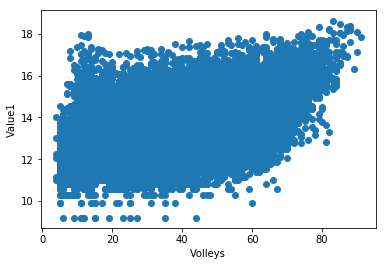

In [146]:
#plotar uma série de gráficos scatters para observar a relação entre cada habilidade e o valor de mercado dos jogadores

y = np.log(value_skills.Value1)

for c in colunas:
    if c != 'Value1':
        plt.figure()
        plt.scatter(value_skills[c], y)
        plt.xlabel(c)
        plt.ylabel("Value1")


Em habilidades existem diversas categorias como chute, reflexos, controle de bola, etc. Foi gerado um gráfico para cada uma das habilidades, que somam 34 no total, que podem ser vistas no Notebook. Nesta categoria é necessário enfatizar que 5 dos gráficos gerados causam curvas estranhas e não se assemelham aos outros gráficos, isso acontece pelo fato dessas habilidades serem exclusivas de goleiros que tem atributos diferentes dos outros jogadores em geral.

## Value x Potential

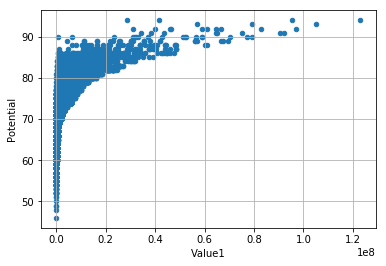

In [147]:
fifa2.plot.scatter(x="Value1",y="Potential");

plt.grid(True)

Que é o quanto um jogador ainda pode evoluir, como mostrado no gráfico possui uma boa relação.

## Value x Wage

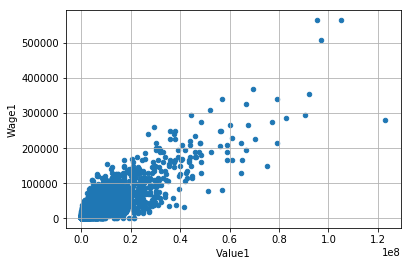

In [148]:
fifa2.plot.scatter(x="Value1",y="Wage1");

plt.grid(True)

O gráfico gerado mostra também com algumas exceções uma boa correlação com o Value

## Value x Preferred Positions

In [149]:
#agrupar as posições em determidados grupos que representam cada região do campo

forward = ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'] #Atacante
midfield = ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCB', 'RCM', 'RDM', 'RM'] #Meio-campo
backward = ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'] #Zagueiro
goalkeeper = ['GK'] #Goleiro


In [150]:

#programa que altera a "Preferred Position" de cada jogador para a região do campo em que ele joga

for x in fifa2["Preferred Position"]:
    
    #Atacante
    if x in forward:
        fifa2["Preferred Position"] = fifa2["Preferred Position"].replace(x, "Forward")
        
    #Meio-campo
    elif x in midfield:
        fifa2["Preferred Position"] = fifa2["Preferred Position"].replace(x, "Midfield")
        
    #Zagueiro
    elif x in backward:
        fifa2["Preferred Position"] = fifa2["Preferred Position"].replace(x, "Backward")
        
    #Goleiro
    elif x in goalkeeper:
        fifa2["Preferred Position"] = fifa2["Preferred Position"].replace(x, "Goalkeeper")
    
    
    

In [151]:
fifa2.head()

,Unnamed: 0,Age,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,Balance,...,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Value1,Wage1,Preferred Position
0,0,32,94,94,€95.5M,€565K,89,63,89,63,...,91,92,31,80,85,88,ST LW,95500000.0,565000.0,Forward
1,1,30,93,93,€105M,€565K,92,48,90,95,...,87,73,28,59,90,85,RW,105000000.0,565000.0,Forward
2,2,25,92,94,€123M,€280K,94,56,96,82,...,90,78,24,53,80,83,LW,123000000.0,280000.0,Forward
3,3,30,92,92,€97M,€510K,88,78,86,60,...,77,89,45,80,84,88,ST,97000000.0,510000.0,Forward
4,4,31,92,92,€61M,€230K,58,29,52,35,...,61,44,10,83,70,11,GK,61000000.0,230000.0,Goalkeeper


In [152]:
#agrupar os jogadores que atuam na mesma região do campo

value_forward = fifa2[fifa2["Preferred Position"]=="Forward"] #Forward -> Atacante
value_midfield = fifa2[fifa2["Preferred Position"]=="Midfield"] #Midfield -> Meio-campo
value_backward = fifa2[fifa2["Preferred Position"]=="Backward"] #Backward -> Zagueiros
value_goalkeeper = fifa2[fifa2["Preferred Position"]=="Goalkeeper"] #Goalkeeper -> Goleiro

In [153]:
#calcular a soma dos valores dos jogadores que atuam nas 4 diferentes regiões do campo

soma_forward = value_forward.Value1.sum() #Forward -> Atacante
soma_midfield = value_midfield.Value1.sum() #Midfield -> Meio-campo
soma_backward = value_backward.Value1.sum() #Backward -> Zagueiros
soma_goalkeeper = value_goalkeeper.Value1.sum() #Goalkeeper -> Goleiro

In [154]:
#calcular a média dos valores dos jogadores que atuam nas 4 diferentes regiões do campo

media_forward = soma_forward / len(value_forward) #Forward -> Atacante
media_midfield = soma_midfield / len(value_midfield) #Midfield -> Meio-campo
media_backward = soma_backward / len(value_backward) #Backward -> Zagueiros
media_goalkeeper = soma_goalkeeper / len(value_goalkeeper) #Goalkeeper -> Goleiro

In [155]:
#criar uma tabela com os valores calculados da soma e média nas células acima para facilitar a vizualização
#e auxiliar na posterior construção de gráficos

tabela = {"Forward": [soma_forward, media_forward], "Midfield": [soma_midfield, media_midfield],
          "Backward": [soma_backward, media_backward], "Goalkeeper": [soma_goalkeeper, media_goalkeeper]}

new_index = ["SUM", "AVERAGE"]

df = pd.DataFrame(tabela)

In [156]:
#adicionar à tabela uma coluna denominda "Index" para facilitar a vizualização dos respectivos valores de soma ("SUM"), e média ("AVERAGE")

index = pd.Series(new_index)

df["Index"] = index
df

,Backward,Forward,Goalkeeper,Midfield,Index
0,1.071074e+10,1.022094e+10,3.191570e+09,1.876845e+10,SUM
1,1.997154e+06,3.089763e+06,1.608654e+06,2.654661e+06,AVERAGE


Forward: €10220935000.0 ---------------> blue
Midfield: €18768450000.0 --------------> green
Backward: €10710735000.0 --------------> red
Goalkeeper: €3191570000.0 -------------> yellow


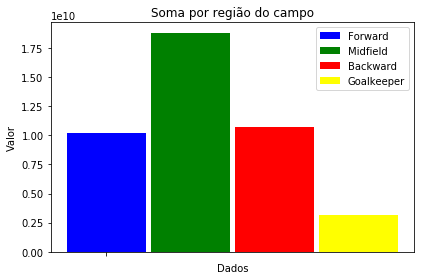

________________________________________________________________________________________________________________________
Forward: €3089762.6964933495 --------------> blue
Midfield: €2654660.53748232 ---------------> green
Backward: €1997153.645347753 --------------> red
Goalkeeper: €1608654.2338709678 -----------> yellow


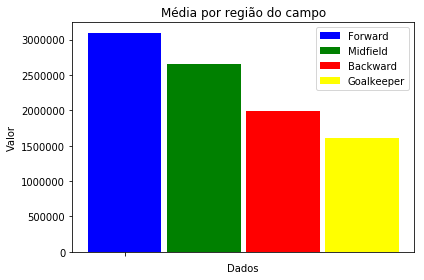

In [157]:
# SOMA DOS VALORES POR CADA REGIÃO DO CAMPO

grupos = 1
indice = np.arange(grupos)
bar_larg = 0.7

plt.bar(indice, soma_forward, bar_larg, color="blue", label='Forward')
plt.bar(indice + bar_larg + 0.05, soma_midfield, bar_larg, color="green", label='Midfield')
plt.bar(indice + 2*bar_larg + 0.1, soma_backward, bar_larg, color="red", label='Backward')
plt.bar(indice + 3*bar_larg + 0.15, soma_goalkeeper, bar_larg, color="yellow", label='Goalkeeper')

plt.xlabel('Dados') 
plt.ylabel('Valor') 
plt.title('Soma por região do campo')
plt.xticks(indice, ("")) 
plt.legend() 
plt.tight_layout()
print("Forward: €{0} ---------------> blue".format(soma_forward))
print("Midfield: €{0} --------------> green".format(soma_midfield))
print("Backward: €{0} --------------> red".format(soma_backward))
print("Goalkeeper: €{0} -------------> yellow".format(soma_goalkeeper))
plt.show()

#_______________________________________________________________________________________________________________________________#
print("________________________________________________________________________________________________________________________")
#_______________________________________________________________________________________________________________________________#

# MÉDIA DOS VALORES POR CADA REGIÃO DO CAMPO

grupos = 1
indice = np.arange(grupos)
bar_larg = 0.7

plt.bar(indice, media_forward, bar_larg, color="blue", label='Forward')
plt.bar(indice + bar_larg + 0.05, media_midfield, bar_larg, color="green", label='Midfield')
plt.bar(indice + 2*bar_larg + 0.1, media_backward, bar_larg, color="red", label='Backward')
plt.bar(indice + 3*bar_larg + 0.15, media_goalkeeper, bar_larg, color="yellow", label='Goalkeeper')

plt.xlabel('Dados') 
plt.ylabel('Valor') 
plt.title('Média por região do campo')
plt.xticks(indice, ("")) 
plt.legend() 
plt.tight_layout()
print("Forward: €{0} --------------> blue".format(media_forward))
print("Midfield: €{0} ---------------> green".format(media_midfield))
print("Backward: €{0} --------------> red".format(media_backward))
print("Goalkeeper: €{0} -----------> yellow".format(media_goalkeeper))
plt.show()

A partir da análise dos gráficos e dos dados coletados da célula acima, percebe-se que os jogadores mais ofesivos ("Forwards") são, em geral, os mais valorizados do jogo, pois apresentam a média mais alta quando comparada com as outras posições, mesmo tendo menos representantes atuando nessa região do campo. Entretanto, pode-se dizer que há poucos jogadores considerados muito caros e muitos considerados muito baratos. Esse é o mundo do futebol, onde é raro alcançar o sucesso. 

# Modelo de Regressão

## Usando todas as features

In [158]:
x = fifa2[['Age', 'Overall', 'Potential',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']]
x.dtypes

Age                   int64
Overall               int64
Potential             int64
Acceleration          int64
Aggression            int64
Agility               int64
Balance               int64
Ball control          int64
Composure             int64
Crossing              int64
Curve                 int64
Dribbling             int64
Finishing             int64
Free kick accuracy    int64
GK diving             int64
GK handling           int64
GK kicking            int64
GK positioning        int64
GK reflexes           int64
Heading accuracy      int64
Interceptions         int64
Jumping               int64
Long passing          int64
Long shots            int64
Marking               int64
Penalties             int64
Positioning           int64
Reactions             int64
Short passing         int64
Shot power            int64
Sliding tackle        int64
Sprint speed          int64
Stamina               int64
Standing tackle       int64
Strength              int64
Vision              

In [159]:
y = fifa2.Value1

In [160]:
def regress(x,y):
    X_cp = sm.add_constant(x)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    return results

In [161]:
results=regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Value1   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     434.0
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:11:29   Log-Likelihood:            -2.9415e+05
No. Observations:               17725   AIC:                         5.884e+05
Df Residuals:                   17687   BIC:                         5.887e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.867e+07    6.1e+05    -46.982      0.000   -2.99e+07   -2.75e+07
Age                -2.617e+05   1.38e+04    -18.924      0.000   -2.89e+05   -2.35e+05
Overall             5.331e+05   1.53e+04     34.935      0.000    5.03e+05    5.63e+05
Potential           7.159e+04    1.2e+04      5.970      0.000    4.81e+04    9.51e+04
Acceleration       -8099.1036   5609.022     -1.444      0.149   -1.91e+04    2895.129
Aggression         -9465.6480   3208.064     -2.951      0.003   -1.58e+04   -3177.528
Agility            -1.218e+04   4283.294     -2.845      0.004   -2.06e+04   -3788.766
Balance             4363.1376   3940.074      1.107      0.268   -3359.794    1.21e+04
Ball control        -4.56e+04   7343.839     -6.209      0.000      -6e+04   -3.12e+04
Composure            1.96e+04   4500.547      4.354      0.000    1.08e+04    2.84e+04
Crossing           -5254.8234   3963.092     -1.326      0.185    -1.3e+04    2513.226
Curve              -1123.1215   4140.308     -0.271      0.786   -9238.531    6992.288
Dribbling              -1e+04   5948.606     -1.681      0.093   -2.17e+04    1659.206
Finishing           1.096e+04   4818.146      2.274      0.023    1510.999    2.04e+04
Free kick accuracy  7555.1086   3687.944      2.049      0.041     326.376    1.48e+04
GK diving          -7398.5478   8706.646     -0.850      0.395   -2.45e+04    9667.334
GK handling        -6809.0105   8785.732     -0.775      0.438    -2.4e+04    1.04e+04
GK kicking          2471.3370   8048.921      0.307      0.759   -1.33e+04    1.82e+04
GK positioning     -2.356e+04   8637.285     -2.728      0.006   -4.05e+04   -6634.053
GK reflexes        -2.273e+04   8640.397     -2.631      0.009   -3.97e+04   -5792.993
Heading accuracy   -1.564e+04   4213.536     -3.712      0.000   -2.39e+04   -7383.411
Interceptions       6152.0830   4575.005      1.345      0.179   -2815.375    1.51e+04
Jumping             4955.1448   3070.327      1.614      0.107   -1062.997     1.1e+04
Long passing        1.305e+04   5072.153      2.572      0.010    3103.836     2.3e+04
Long shots         -1.673e+04   4496.544     -3.720      0.000   -2.55e+04   -7912.120
Marking            -6.474e+04   5787.800    -11.186      0.000   -7.61e+04   -5.34e+04
Penalties            769.3934   4006.695      0.192      0.848   -7084.123    8622.909
Positioning         8270.7584   4555.521      1.816      0.069    -658.509    1.72e+04
Reactions           4.712e+04   6288.123      7.494      0.000    3.48e+04    5.94e+04
Short passing      -1.164e+04   6834.371     -1.703      0.089    -2.5e+04    1755.031
Shot power         -1.691e+04   4231.252     -3.996      0.000   -2.52e+04   -8613.247
Sliding tackle      2.739e+04   6664.692      4.109      0.000    1.43e+04    4.05e+04
Sprint speed       -7733.8958   5252.5

## Linear Regression

In [162]:
model = LinearRegression();
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=22)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r_quadrado = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)

print("R-squared: {0}".format(r_quadrado))

R-squared: 0.480098306209503


O resultado via regressão linear apresenta um Rquadrado de aproximadamente 0.48, o que o grupo considera longe do ideal. 

## Random Forest Regression

In [163]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r_quadrado = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)

print("R-squared: {0}".format(r_quadrado))

R-squared: 0.9602496274871748


O resultado obtido via random forrest foi de um Rquadrado de aproximadamente 0.95, acima do esperado pelo grupo e de alta acurácia. Com esse resultado, o projeto atingiu seu objetivo.

In [164]:
atributos_importantes = sorted(list(zip(model.feature_importances_, x.columns)), reverse=True)
atributos_importantes
#Lista em ordem dos atributos mais relevates para a predição do preço. 
#Podemos observar que o Overall é predominante sobre os outros atributos.

[(0.8641648815172394, 'Overall'),
 (0.07694611459580115, 'Potential'),
 (0.01884552448322053, 'Age'),
 (0.0072134830234288055, 'Finishing'),
 (0.004800811271900284, 'Reactions'),
 (0.0035526294659859728, 'Volleys'),
 (0.002558265395135898, 'Penalties'),
 (0.0023393207508783415, 'Free kick accuracy'),
 (0.0023167339510656946, 'Positioning'),
 (0.0021291138242631015, 'Stamina'),
 (0.0015330788258502846, 'Ball control'),
 (0.0013342628064953077, 'Dribbling'),
 (0.0011881021676582596, 'Acceleration'),
 (0.0011189623169503408, 'Sprint speed'),
 (0.0009438055246017479, 'Vision'),
 (0.0008449884364657087, 'Marking'),
 (0.0007467013126674167, 'GK handling'),
 (0.0007102360458688105, 'Composure'),
 (0.0005861170743323629, 'Sliding tackle'),
 (0.000528047899156398, 'GK kicking'),
 (0.0004954558170268241, 'Heading accuracy'),
 (0.0004499100644534186, 'Aggression'),
 (0.00044283198883611475, 'Balance'),
 (0.00043416816546089555, 'Standing tackle'),
 (0.00043377081415240157, 'Short passing'),
 (0.0

In [166]:
nome_variavel_1 = atributos_importantes[0][1]
nome_variavel_2 = atributos_importantes[1][1]

variavel_1 = atributos_importantes[0][0]
variavel_2 = atributos_importantes[1][0]

In [167]:
soma_variavel_1_2 = (variavel_1 + variavel_2) * 100
print("As variáveis {0} e {1} representam {2}% na determinação do valor de mercado do jogador".format(nome_variavel_1,
                                                                                                     nome_variavel_2, 
                                                                                                     round(soma_variavel_1_2, 2)))

As variáveis Overall e Potential representam 94.11% na determinação do valor de mercado do jogador


## Só com o Overall

In [168]:
x = fifa2[["Overall"]]
y = fifa2.Value1

In [169]:
def regress(x,y):
    X_cp = sm.add_constant(x)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    return results

In [170]:
results=regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Value1   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:20:06   Log-Likelihood:            -2.9537e+05
No. Observations:               17725   AIC:                         5.907e+05
Df Residuals:                   17723   BIC:                         5.908e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.975e+07   2.99e+05    -99.652      0.000   -3.03e+07   -2.92e+07
Overall     4.857e+05   4482.046    108.358      0.000    4.77e+05    4.94e+05
==============================================================================
Omnibus:                    24440.598   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9783404.797
Skew:                           7.890   Prob(JB):                         0.00
Kurtosis:                     117.009   Cond. No.                         634.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression

In [171]:
model = LinearRegression();
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=22)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r_quadrado = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)

print("R-squared: {0}".format(r_quadrado))

R-squared: 0.4030725484244334


## Random Forest Regression

In [172]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r_quadrado = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)

print("R-squared: {0}".format(r_quadrado))

R-squared: 0.8651744263946146


## Apenas com skills

In [174]:
x = fifa2[['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']]

y = fifa2.Value1

In [175]:
def regress(x,y):
    X_cp = sm.add_constant(x)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    return results

In [176]:
results=regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Value1   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     275.7
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:23:22   Log-Likelihood:            -2.9610e+05
No. Observations:               17725   AIC:                         5.923e+05
Df Residuals:                   17690   BIC:                         5.925e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.332e+07   4.41e+05    -52.831      0.000   -2.42e+07   -2.25e+07
Acceleration        2.868e+04   6222.558      4.609      0.000    1.65e+04    4.09e+04
Aggression         -2.243e+04   3561.056     -6.298      0.000   -2.94e+04   -1.54e+04
Agility            -2.646e+04   4770.195     -5.547      0.000   -3.58e+04   -1.71e+04
Balance            -1.191e+04   4386.561     -2.716      0.007   -2.05e+04   -3316.731
Ball control        5.939e+04   7970.586      7.451      0.000    4.38e+04     7.5e+04
Composure           5.857e+04   4793.504     12.218      0.000    4.92e+04     6.8e+04
Crossing           -2.452e+04   4332.163     -5.659      0.000    -3.3e+04    -1.6e+04
Curve               5234.5867   4621.418      1.133      0.257   -3823.845    1.43e+04
Dribbling           2.414e+04   6595.870      3.659      0.000    1.12e+04    3.71e+04
Finishing           2.541e+04   5367.976      4.733      0.000    1.49e+04    3.59e+04
Free kick accuracy  3939.3769   4110.169      0.958      0.338   -4116.958     1.2e+04
GK diving            3.94e+04   9680.000      4.071      0.000    2.04e+04    5.84e+04
GK handling         4.082e+04   9756.609      4.183      0.000    2.17e+04    5.99e+04
GK kicking          2.056e+04   8975.023      2.291      0.022    2969.677    3.82e+04
GK positioning      1775.1682   9575.479      0.185      0.853    -1.7e+04    2.05e+04
GK reflexes         2.173e+04   9606.127      2.263      0.024    2906.030    4.06e+04
Heading accuracy    3.665e+04   4557.590      8.042      0.000    2.77e+04    4.56e+04
Interceptions       1543.1204   5097.822      0.303      0.762   -8449.110    1.15e+04
Jumping             4189.1311   3423.965      1.223      0.221   -2522.177    1.09e+04
Long passing       -2349.5682   5657.644     -0.415      0.678   -1.34e+04    8739.969
Long shots         -3.244e+04   5013.386     -6.470      0.000   -4.23e+04   -2.26e+04
Marking            -7.718e+04   6444.985    -11.976      0.000   -8.98e+04   -6.45e+04
Penalties          -7972.9096   4458.822     -1.788      0.074   -1.67e+04     766.818
Positioning         -2.95e+04   5041.794     -5.850      0.000   -3.94e+04   -1.96e+04
Reactions           1.906e+05   6057.650     31.469      0.000    1.79e+05    2.02e+05
Short passing       4.968e+04   7559.147      6.572      0.000    3.49e+04    6.45e+04
Shot power          -887.8693   4716.769     -0.188      0.851   -1.01e+04    8357.460
Sliding tackle      2.901e+04   7425.765      3.907      0.000    1.45e+04    4.36e+04
Sprint speed        2.643e+04   5833.465      4.531      0.000     1.5e+04    3.79e+04
Stamina             2126.3592   3938.920      0.540      0.589   -5594.309    9847.028
Standing tackle     5.595e+04   7658.714      7.305      0.000    4.09e+04     7.1e+04
Strength           -6199.8684   4090.4

## Linear Regression

In [177]:
model = LinearRegression();
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=22)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r_quadrado = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)

print("R-squared: {0}".format(r_quadrado))

R-squared: 0.3475613663935049


## Random Forest Regression

In [178]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r_quadrado = 1 - mean_squared_error(y_test, y_pred) / np.var(y_test)

print("R-squared: {0}".format(r_quadrado))

R-squared: 0.818756578997169


In [179]:
atributos_importantes = sorted(list(zip(model.feature_importances_, x.columns)), reverse=True)
atributos_importantes

[(0.5549962827986, 'Reactions'),
 (0.1405540646841588, 'Ball control'),
 (0.03690347731850905, 'Standing tackle'),
 (0.03662911520408011, 'Long shots'),
 (0.02067543618178598, 'Dribbling'),
 (0.018314080273610686, 'Finishing'),
 (0.012840445435949801, 'GK reflexes'),
 (0.01151113738040226, 'Volleys'),
 (0.010002345415580441, 'Sliding tackle'),
 (0.009476017583678208, 'GK handling'),
 (0.00944865326254084, 'Sprint speed'),
 (0.009363823453050715, 'Heading accuracy'),
 (0.009310650745042821, 'Marking'),
 (0.0085250200578983, 'GK diving'),
 (0.007942969903512379, 'Short passing'),
 (0.0077617061386671985, 'Interceptions'),
 (0.007308053638071845, 'Vision'),
 (0.007237730144564715, 'Stamina'),
 (0.007195670515682692, 'Aggression'),
 (0.006904116939624993, 'Free kick accuracy'),
 (0.006484984331751033, 'Positioning'),
 (0.006401175445632533, 'Acceleration'),
 (0.006281270762795932, 'Strength'),
 (0.006042374620131673, 'Shot power'),
 (0.005882511143589827, 'Curve'),
 (0.005074810718414529, 

In [180]:
nome_variavel_1 = atributos_importantes[0][1]
nome_variavel_2 = atributos_importantes[1][1]

variavel_1 = atributos_importantes[0][0]
variavel_2 = atributos_importantes[1][0]

In [181]:
soma_variavel_1_2 = (variavel_1 + variavel_2) * 100
print("As variáveis {0} e {1} representam {2}% na determinação do valor de mercado do jogador".format(nome_variavel_1,
                                                                                                     nome_variavel_2, 
                                                                                                     round(soma_variavel_1_2, 2)))

As variáveis Reactions e Ball control representam 69.56% na determinação do valor de mercado do jogador


## Método Utilizado

O processo em que se tem o interesse de analisar o comportamento de uma variável a partir de outra é conhecido como regressão. Ele apresenta diversas maneiras de resolução, dentre elas, métodos que levam o nome de regressão linear, múltipla ou Random Forest surgem para suprir os diferentes tipos de problemas. Assim como na maioria dos casos, em nosso classificador é necessário mais de uma variável para obter-se melhor acurácia no resultado final. Dessa forma, descarta-se a ferramenta de regressão linear simples e adere-se aos dois outros métodos: regressão linear múltipla e Random Forest Regression.

Entretanto, existem diferenças tanto conceituais, na forma de resolução, quanto empíricas, no resultado. Para discorrermos a partir dessas diferenças, é válido expor as duas maneiras de resolução que esses métodos aderem e em seguida, junto com o projeto, justificar a diferença nos resultados obtidos.

A Multiple Linear Regression provêm da Simple Linear Regression, com a diferença de que ela trabalha com mais de uma variável. Apesar disso, o método é mantido e realizado da seguinte forma: de forma mais informal e pontual, pode-se dizer que os dados são agrupados em uma reta. Em outras palavras, admitindo-se que X1 , X2 , ..., Xk sejam as variáveis independentes e Y a variável dependente, dada uma amostra de n observações, [x1i, x2i, x3i, … , xki, Yi] com i =1, 2, 3, … , n, o modelo de Multiple Linear Regression será dado por: Yi = β0 + β1*x1i + β2*x2i + ... + βk*xki ou seja, Yi = constante + coeficiente 1 * x1i + coeficiente 2 * x2i +...+ coeficiente k * xki.
O Random Forest Regression, por sua vez, utiliza um método diferente, classificado popularmente por árvore de decisões.


A primeira etapa do processo de Random Forest resume-se em sortear aleatoriamente um valor de sua variável X e recorrer ao método da árvore de decisões para encontrar o respectivo valor de Y.

A árvore de decisões funciona da seguinte forma: em cada ramo da estrutura, o valor sorteado aleatoriamente do modelo pode prosseguir dois caminhos distintos até que seu respectivo valor Y seja encontrado e seja aproximado para seus vizinhos, como uma constante. 

Entretanto, vale ressaltar que esse processo ocorre milhares de vezes até alcançar uma função que aproxima ao máximo dos dados reais, impedindo que resulte em uma função afim em que para todo X exista um Y.

Comparando os métodos de resolução de ambos os processos, pressupõe-se que a ferramenta Random Forest Regression é mais eficaz do que a Multiple Linear Regression por motivos, como: a segunda estima uma função retilínea, o que pode ser prejudicial em casos em que os dados não segue uma distribuição regular, enquanto a primeira fornece uma função que parece caminhar junto aos dados reais. 

# Conclusão

   Concluímos, portanto, que a regressão linear múltipla não promovia a melhor análise para o nosso problema, e sim, a Random Forest Regression, pois essa se adapta melhor às diversas variações do grande dataset em estudo. O modelo foi subdivido para avaliar quatro datasets com a ausência de algumas categorias, usando primeiro a regressão linear e posteriormente a Random Forest Regression em cada uma das avaliações. Primeiramente, foram avaliadas todas as features (Salário, Potencial, Idade, Nível e Habilidades), obtendo um percentual de 48% de acurácia no primeiro método, e 96% com o segundo, deixando evidenciada a superioridade de análise pelo Random Forest Regression com o dataset em questão. Além disso percebe-se que o resultado obtido deste modelo completo, restringe-se grande parte à feature overall que apresenta uma influência de 86,41% no comportamento da variável Value, ou seja, mostra o quanto essa característica influencia na determinação do valor do jogador, o que dá suporte à hipótese de que este seja um número gerado a partir de uma regressão feita anteriormente pelo jogo, ou um valor já feito de forma a ter grande correlação com o Value, como foi mencionado antes no gráfico mostrado em Organização do Notebook (Value X Overall). 

   A segunda iteração foi feita apenas com o Overall, no intuito de analisar as questões levantadas em momentos anteriores quanto a correlação intrínseca do Value com o Overall. Assim, os resultados obtidos foram 40,3% com Regressão Linear Múltipla e 86,51% usando Random Forest Regression, o que é menos do que o obtido nas últimas iterações. No entanto, é válido ressaltar que esta é uma categoria sozinha sendo analisada com todo o dataset, e assim, os resultados obtidos não foram ruins, concluindo que existe uma correlação muito alta entre as duas features. 


   A terceira e última iteração foi feita apenas com as Skills, que contém 34 categorias diferentes, obtendo 34,75%, resultado que já era esperado, pois os números são muito dispersos entre si e não são bem analisados por uma Regressão Linear Múltipla. Entretanto, atingiu-se 81,87% usando Random Forest Regression, o que mostra, como visto nos gráficos, exceto os 5 de goleiros, que há uma grande correlação entre as Skills do jogador e o seu valor de mercado. Analisando quais skills individuais são mais levadas em conta, chega-se à conclusão com 55,49% de relevância que as “Reactions” do jogador influenciam mais da metade de seu valor de mercado, seguido por “Ball Control” com 14% de influência.

